Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Kevin Pham"

---

# Homework 10

In this assignment, we're working with SQLite3. We'll also be working with the SAKILA database. This database contains transactions from a fictional chain of DVD rental stores. It was created in 2006 by Mike Hillyer and has since been used as an example database in many textbooks and on several SQL "playground" websites. 

Download the file "sqlite-sakila.db" from Canvas. Save the file in the same directory where you have saved this notebook (or in some other directory for which you know the path). You can find an ER-schema of the Sakila database on Canvas. Look at the ER-schema to understand the structure of the Sakila database. 

For all problems below, if you are not able to write `SQLite3` code to obtain results, try to write at least the corresponding SQL code statement. If you can't run the code, you won't be able to get answers, of course, but you could at least get partial credit for your SQL statements. 

**Example Question:** How many different languages can you find in the `language` table? 

**Example Perfect Answer:**

In [2]:
import sqlite3
import pandas as pd

def run_query(q):
    with sqlite3.connect("sqlite-sakila.db") as con:
            # Change the path to where YOU have saved the sqlite-sakila.db file
            # IF you have saved the file in the same folder as this notebook, the above should work without changes
        return pd.read_sql(q, con)

run_query("SELECT * FROM language")

,language_id,name,last_update
0,1,English,2021-03-06 15:51:48
1,2,Italian,2021-03-06 15:51:48
2,3,Japanese,2021-03-06 15:51:48
3,4,Mandarin,2021-03-06 15:51:48
4,5,French,2021-03-06 15:51:48
5,6,German,2021-03-06 15:51:48


Answer: There are six languages (English, Italian, Japanese, Mandarin, French, and German). 

**Example Answer (for partial credit):**

SQL code: 
```SELECT * FROM language;``` 

Then count how many entries are in that table. 

### Problem 1

(a) Find the SQL statement that was used to create the `rental` table. Print the SQL statement to the console. 
Note that the `\n` in the SQL statement are line breaks in Python. Your print statement should be nicely formatted (each variable in a new row) and there should be no more `\n` visible in your print statement. 

In [3]:
# COMPLETE 
# YOUR CODE HERE
# Display is the NEW PRINT STATEMENT.

con = sqlite3.connect("sqlite-sakila.db") # manual open the connection
cur = con.cursor() # create a cursor
cur.execute("SELECT name,sql FROM sqlite_schema WHERE name == 'rental'") # find the right criteria under sqlite_schema relation
print(cur.fetchall()[0][1]) # cur.fetchall is a LIST, find the only relevant element in it
con.close() # close connection when done.

# raise NotImplementedError()

CREATE TABLE rental (
  rental_id INT NOT NULL,
  rental_date TIMESTAMP NOT NULL,
  inventory_id INT  NOT NULL,
  customer_id INT  NOT NULL,
  return_date TIMESTAMP DEFAULT NULL,
  staff_id SMALLINT  NOT NULL,
  last_update TIMESTAMP NOT NULL,
  PRIMARY KEY (rental_id),
  CONSTRAINT fk_rental_staff FOREIGN KEY (staff_id) REFERENCES staff (staff_id) ,
  CONSTRAINT fk_rental_inventory FOREIGN KEY (inventory_id) REFERENCES inventory (inventory_id) ,
  CONSTRAINT fk_rental_customer FOREIGN KEY (customer_id) REFERENCES customer (customer_id)
)


(b) Describe the `rental` table:
* How many variable columns does that table have (according to the SQL command)? 
* What is the primary key of the `Rental` table? 
* How many foreign keys are there? Which tables do they link to? 
* What are the variable types of the variables `rental_date` and `return_date`? 
* What does the `NOT NULL` and `DEFAULT NULL` statements mean, respectively, that appear after `rental_date` and `return_date`? 

'rental' has 7 columns in it. The primary key is 'rental_id'. There are a total of 3 foreign keys (fk_rental_staff links to staff_id, fk_rental_inventory links to inventory_id, fk_rental_customer links to customer_id). rental_date takes on the 'dates' type under TIMESTAMP and the return_date also takes on the 'dates' type under TIMESTAMP. The 'NOT NULL' means it cannot take on missing values whereas 'DEFAULT NULL' does the opposite.

### Problem 2

What are the variable types of the variables `staff_id`, and `rental_id` in the `rental` table, respectively? Why is it useful or necessary to use different variable types for these three variables? Why can't they both be stored as tinyint's for example? 

staff_id is a 'SMALLINT', which is an integer with the second smallest range in sqlite, whereas rental_id is a 'INT', which is an integer has range '-2,147,483,648 to 2,147,483,647' signed and '0 to 4,294,967,295' unsigned. staff_id appears to only take on two integers being either 1 or 2, so it would make sense to just use 'SMALLINT'. rental_id takes on integer values currently up to 16049. The types for each of these variables are necesssary because it allows for further expansion if staff_id calls for it and creates a lot of room for future transactions under the rental_id. The preallocation of storage preemptively based on the variable makes the database run smoothly.

### Problem 3

The primary key of the `actor` table (which is `actor_id`) does not auto-increment. There are currently 200 actors in the `actor` table. Modify the `actor` table to list your own first and last name under `actor_id` 201. Use `date('now')` to enter the current time and date. 

Then print out all rows of the actor table for actors with the same last name as yours. 

In [4]:
# COMPLETE
con = sqlite3.connect("sqlite-sakila.db")
cur = con.cursor()
cur.execute("DELETE FROM actor WHERE (actor_id==201)") 
        # adding in this line, so that you can try out code more than once during development
# create your own line
act = cur.execute("INSERT INTO actor (actor_id, first_name, last_name, last_update) \
                    VALUES (201, 'Kevin', 'Pham', date('now'))") # queue in relevant data
con.commit() # commit to it

# YOUR CODE HERE
#raise NotImplementedError()

con.close() # close the connection

**Optional:** If you can't get your SQLite3 code to work, leave the SQL statement(s) you would use for the above tasks below. 

YOUR ANSWER HERE

### Problem 4

(a) Use Python to extract the columns `staff_id`, `amount`, and `payment_date` from the `Payment` table. 
Store these data in a Pandas data frame and display the data frame to the console for the grader to see.

In [5]:
# COMPLETE
# YOUR CODE HERE
con = sqlite3.connect("sqlite-sakila.db") # connect to database
sq_frame = pd.read_sql("SELECT staff_id,amount,payment_date FROM Payment",con) # retrieve the relevant data into a dataFrame
cur = con.cursor() # establish cursor

cur.execute("SELECT staff_id,amount,payment_date FROM Payment")
comp = cur.fetchall() # retrieve the data, each entry should be in order of (staff_id,amount,payment_date) as a tuple
# note: list[tuple-wise][pos in the tuple]

# retrieve the data from each tuple
staff_id = []
amount = []
payment_date = []
for i in range(len(comp)):
    staff_id.append(comp[i][0])
    amount.append(comp[i][1])
    payment_date.append(comp[i][2])

# establish the dataframe
sq_frame = pd.DataFrame({"staff_id":staff_id, "amount":amount, "payment_date":payment_date})
display(sq_frame) # display it



con.close() # close the connection
# raise NotImplementedError()

,staff_id,amount,payment_date
0,1,2.99,2005-05-25 11:30:37.000
1,1,0.99,2005-05-28 10:35:23.000
2,1,5.99,2005-06-15 00:54:12.000
3,2,0.99,2005-06-15 18:02:53.000
4,2,9.99,2005-06-15 21:08:46.000
...,...,...,...
16044,1,4.99,2005-08-21 17:43:42.000
16045,1,1.99,2005-08-21 21:41:57.000
16046,2,8.99,2005-08-23 06:09:44.000
16047,2,2.99,2005-08-23 11:08:46.000


**Optional:** If you can't get your SQLite3 code to work, leave the SQL statement(s) you would use for the above tasks below. 

YOUR ANSWER HERE

(b) For the dataframe created in (a), take the date values and use either string formating or the [`pd.DatetimeIndex()` method](https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html)  to extract just the month and the year of the transaction. Store both in separate columns of the data frame. 

Use groupby to find the total monthly transaction amounts, separately for each employee. 

Use Matplotlib to create a line-plot that shows the total transaction amount per employee per month as a function of time. Label the x-axis with the appropriate month/year combination and include one line per employee. Include a legend to indicate which line belongs to which employee. You can find an image on Canvas with an example of what your graph should look like. 

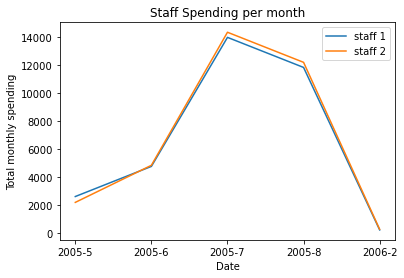

In [6]:
# COMPLETE
import matplotlib.pyplot as plt
import numpy as np


# YOUR CODE HERE
# retrieve the month and year
sq_frame['month'] = pd.DatetimeIndex(sq_frame['payment_date']).month
sq_frame['year'] = pd.DatetimeIndex(sq_frame['payment_date']).year

new = sq_frame.groupby(['year','month','staff_id']).sum().unstack(-1) # group by relevant variables
# index looks terrible, let's reset it
new.reset_index(inplace=True)

# extract date ticks in order to plot with
date_axis = []
for i in range(len(new)):
    date_axis.append(new.year[i].astype(str) + "-" + new.month[i].astype(str))

# establish plot
fig = plt.figure()
ax = plt.axes()

# plot it traversing through each staff_id
for i,j in enumerate(list(set(staff_id))):
    ax.plot(date_axis,new.amount[j],label = "staff " + str(j))

# graph cosmetics
ax.set_title("Staff Spending per month"); # add a title
ax.set_ylabel("Total monthly spending"); # ylabel
ax.set_xlabel("Date"); #xlabel

# legend
ax.legend();


# raise NotImplementedError()